In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme() 

In [2]:
elastic_net = pd.read_csv("./metrics/111_elastic_net.csv.zip")
lasso = pd.read_csv("./metrics/111_lasso.csv.zip")
linear_regression = pd.read_csv("./metrics/111_linear_regression.csv.zip")
logistic_regression = pd.read_csv("./metrics/111_logistic_regression.csv.zip")
random_forest = pd.read_csv("./metrics/111_random_forest.csv.zip")
decision_tree = pd.read_csv("./metrics/111_decision_tree.csv.zip")
mlp = pd.read_csv("./metrics/111_mlpr.csv.zip")
xgboost = pd.read_csv("./metrics/111_xgboost.csv.zip")

In [3]:
metrics = pd.concat([elastic_net,lasso,
                     linear_regression,logistic_regression,
                     random_forest,decision_tree,mlp,xgboost])

In [4]:
metrics.sort_values("r2",ascending=False,inplace=True)

In [5]:
metrics

,model,r2,mae,mse,rmse,mape,time_to_fit,time_to_predict
0,XGBoost,0.953530,20.034035,731.235836,27.041373,0.064589,0.352622,0.003792
0,Random Forest,0.944241,21.576381,877.390060,29.620771,0.069072,0.898534,0.031277
0,Decision Tree,0.908011,27.396367,1447.499851,38.046023,0.086504,0.015129,0.000703
0,MLP,0.508397,68.654135,7735.613240,87.952335,0.226341,4.796759,0.001423
0,Lasso,0.370830,76.917355,9900.305978,99.500281,0.253358,0.008864,0.000650
0,Linear Regression,0.369789,77.413487,9916.675817,99.582508,0.253687,0.016756,0.000559
0,Elastic Net,0.339265,79.122850,10396.989901,101.965631,0.260806,0.004529,0.000478
0,Logistic Regression,0.213617,79.374628,12374.133413,111.239082,0.251797,8.988964,0.015439


In [6]:
metrics.to_csv("./metrics/112_initial_metrics.csv.zip",index=False,compression="zip")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


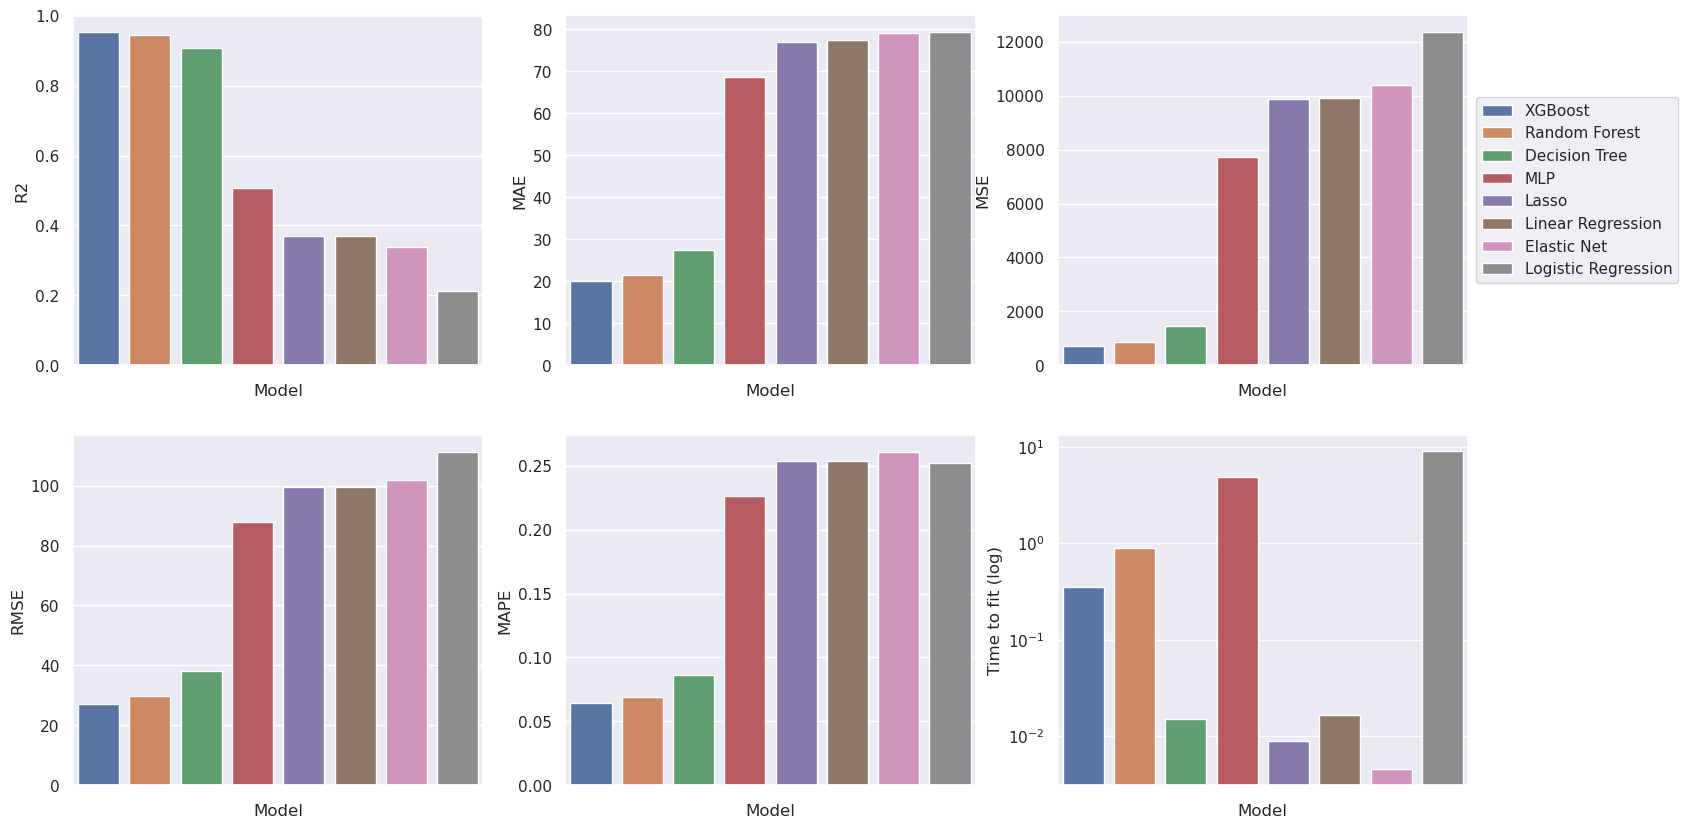

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.barplot(ax=axes[0, 0], data=metrics, x='model', y='r2',hue="model",dodge=False)
sns.barplot(ax=axes[0, 1], data=metrics, x='model', y='mae',hue="model",dodge=False)
sns.barplot(ax=axes[0, 2], data=metrics, x='model', y='mse',hue="model",dodge=False)
sns.barplot(ax=axes[1, 0], data=metrics, x='model', y='rmse',hue="model",dodge=False)
sns.barplot(ax=axes[1, 1], data=metrics, x='model', y='mape',hue="model",dodge=False)
sns.barplot(ax=axes[1, 2], data=metrics, x='model', y='time_to_fit',hue="model",dodge=False)

axes[0, 0].set(xlabel="Model",xticklabels=[])
axes[0, 0].set(ylabel="R2")
axes[0, 0].get_legend().remove()

axes[0, 1].set(xlabel="Model",xticklabels=[])
axes[0, 1].set(ylabel="MAE")
axes[0, 1].get_legend().remove()

axes[0, 2].set(xlabel="Model",xticklabels=[])
axes[0, 2].set(ylabel="MSE")
axes[0, 2].legend(loc='center left', bbox_to_anchor=(1, 0.5))

axes[1, 0].set(xlabel="Model",xticklabels=[])
axes[1, 0].set(ylabel="RMSE")
axes[1, 0].get_legend().remove()

axes[1, 1].set(xlabel="Model",xticklabels=[])
axes[1, 1].set(ylabel="MAPE")
axes[1, 1].get_legend().remove()

axes[1, 2].set(xlabel="Model",xticklabels=[])
axes[1, 2].set(ylabel="Time to fit (log)", yscale="log")
axes[1, 2].get_legend().remove()

plt.savefig("./plots/112_yonge_count_incidents_metrics.eps",format="eps",bbox_inches="tight")
plt.savefig("./plots/112_yonge_count_incidents_metrics.png",bbox_inches="tight")